<a href="https://colab.research.google.com/github/assamidanov/Important-Featues-of-IDPs-/blob/master/Feature_Importances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Model - Feature Importances

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import seaborn as sns

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1-1NWM4Q7QrZCq8zDtYpCC08NCd2-lNXM'}) # replace the id with id of file you want to access
downloaded.GetContentFile('df_arqaam.csv') 

# Displacement Data: Afghanistan (Herat, Jalalabad)

Background Information
Afghanistan faces one of the world’s most acute internal displacement crises; resulting of several factors such as protracted conflict, ongoing insecurity, and natural hazards. Displacement has become a familiar survival strategy for many Afghans and, in some cases, an inevitable part of life for two generations. As of 31 December 2018, Afghanistan has 2,598,000 total number of internally displaced persons (IDPs)(http://www.internal-displacement.org/).
 
Displacement affects all individuals differently with needs, vulnerabilities and protection risks evolving due to exhaustion of coping mechanisms and only basic emergency assistance provided following initial displacement. Inadequate shelter, food insecurity, insufficient access to sanitation and health facilities, as well as a lack of protection, often result in precarious living conditions that jeopardize the well-being and dignity of affected families.


## Aim of the Project

The survey was taken by Arqaam to monitor and evaluate the NGOs’ humanitarian assistance projects. It is also directed towards understanding the status-quo before the beginning of the project, and the impact the project had over time. 

The survey has 237 comprehensive questions and 11260 respondents. The survey was taken in a randomly stratified approach. Jalalabad and Herat were chosen as a target region. It can be claimed with its variety of ethnic groups and displacement specifications both cities can be representative of the whole of Afghanistan.

This project aims to perform a machine-learning algorithm to predict the displacement status of the respondents based on them based on the responses from the questionnaire. Then, to determine important features that define displacement status of residents by using state of art techniques.  In this project, I used two Machine Learning algorithms like Random Forest Classifier and CatBoost Classifier to identify these important features. I also used 4 feature importance techniques: Default feature importance, Permutation feature importance, Drop Column feature importance and Shapley Additive explanations (SHAP).   By comparing the outcomes of these techniques, I will determine the most important and the least important features.


In [0]:
import pandas as pd
df = pd.read_csv('df_arqaam.csv')

In [6]:
pd.crosstab(df.Status,df.fam_origin)

fam_origin,0,1
Status,,
0,1066,0
1,100,0
2,2217,0
3,527,7350


In [0]:
del df['fam_origin']

In [8]:
df.head()

,loc_herat,Status,sex,marital_st,ethnic,hh_total,male_0_4years,fem_5_11years,male_5_11years,fem_12_17years,male_12_17years,fem_18_59years,male_18_59years,fem_60years,male_60years,fem_15_24years,male_15_24years,hh_lit_female,hh_lit_male,people_working,income_monthly,school_attending,food_exp,heating_exp,trans_exp,saving,debt,vul_minor,vul_woman,vul_sing_male,vul_sing_female,vul_plw,vul_drugs,vul_old,vul_pdisabled,vul_mdisabled,vul_medcial,vul_special,vul_ochildren,educ_family,educ_level,electric,clean,latrine_share,sep_latrine,have_tazkera,health_prox,soc_assist,shelter_type,own_land,livestock_type,kitchen_items,school_items,own_matress,water_containers,hygiene_items
0,0,3,1,2,5,7,0,0,0,1,2,2,2,0,0,2,3,3,4,2,8000,1,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,2,1,2,0,0,1,1,0,4,1,26,1,1,0,1,1
1,0,3,0,2,2,5,0,0,0,0,0,3,1,0,1,2,0,3,2,1,3000,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,5,1,2,0,0,1,1,0,4,0,26,1,1,0,0,1
2,0,3,0,2,4,17,0,0,0,0,4,7,5,0,1,3,5,7,10,3,7000,1,3,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,3,8,1,2,0,0,1,1,0,4,0,26,1,1,0,0,1
3,0,3,0,5,5,9,0,0,0,0,0,4,4,1,0,2,1,5,4,1,4000,1,3,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,1,2,0,0,1,1,0,1,0,26,1,0,0,0,1
4,0,3,0,2,5,8,0,0,1,2,0,2,2,0,1,4,2,4,3,1,3000,0,3,2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,2,0,0,1,1,0,4,0,26,1,1,0,1,1


According to the bar chart above, 90.57% percent of the respondents are Host, which is 10198 people. 9.01% of the respondents displaced because of war and criminal violence. The other 0.28 and 0.14 displacements happened due to natural disasters and economic conditions

# Machine Learning Model: Feature Importance

As per the problem statement, the emphasis is on identifying the importance of a particular feature in the machine learning model. This is a multiclass classification problem, wherein we need to identify the important features. It is also necessary to justify the reasons by showing why it was chosen those specific features and how it turns out to be important features. Identifying important features is very important due to the following reasons:
-	It will help to improve the models by concentrating on important features.
-	It will help to remove features that are not relevant, or which do not contribute to the model’s performance. 

## Random Forest Model

Random Forest Classifier was chosen as a benchmark model since is it is often used for feature selection in a data science workflow. The reason is that the tree-based strategies used by random forests naturally rank by how well they improve the purity of the node. This means a decrease in impurity over all trees (called Gini impurity). Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. Thus, by pruning trees below a particular node, we can create a subset of the most important features.

Because of the comprehensiveness of the data, and its survey specifications, which captures all the relevant information, the accuracy of the model is 95%. This result will create robustness in our important features test. However, I did not focus on tuning in hyperparameters to increase accuracy since it is not the primary goal of this project



In [0]:
Y = df['Status']
del df['Status']
X = df.copy()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators = 1000,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8215823466092572


In [0]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    plt.figure(figsize=(15,10))
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)
    plt.show()

## Default feature importance
The default feature importance technique (feature_importances_ in Scikit-Learn) is based on the concept of training a tree and computing how much each feature contributes to decreasing the weighted impurity. In the case of Random Forest, it takes the average of the decrease in impurity over trees.    

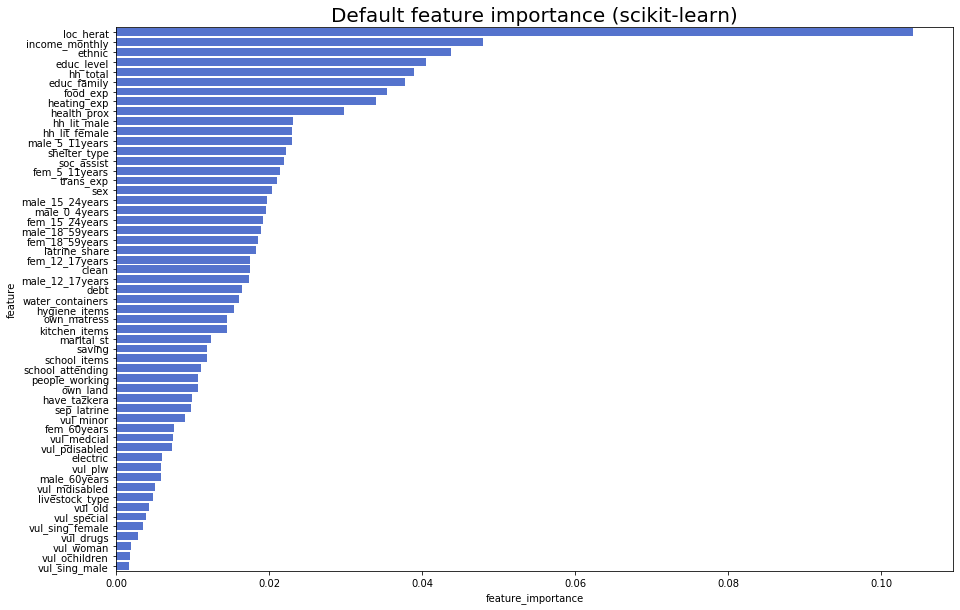

In [0]:
base_imp = imp_df(X_train.columns, clf.feature_importances_)
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

The bar chart above explains how much prediction changes if we change the features. As the variables are in factions, the overall summation will be 1.
It seems that the top 6 the most important features are:
-	_Fam_origin_ – if the respondent’s family is originally from Jalalabad/Herat
-	_Loc_herat_ – the region the respondent belongs to 
-	_Soc_assist_ - whether respondent’s family ever received any assistance from any organization or government, the local community or relatives
-	_Income_monthly_ – monthly income
-	_Food_exp_ - food expenditure 
-	_Hh_total_ - total household composition
Intuitively, the importance of these features makes sense to determine the status IDPs. However, this approach is assumed to be biased, as it tends to inflate the importance of continuous features or high-cardinality categorical variables. Hence, it is necessary to compare with other alternative approaches so that our results would be more robust.


### Permutation feature importance

The permutation feature importance is defined to be the decrease in a model score when a single feature value is randomly shuffled 1. This procedure breaks the relationship between the feature and the target, thus the drop in the model score is indicative of how much the model depends on the feature. This technique benefits from being model agnostic and can be calculated many times with different permutations of the feature.

Source(https://scikit-learn.org/stable/modules/permutation_importance.html)

In [0]:
!pip install rfpimp
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(rf, X_train, y_train):
    return r2_score(y_train, clf.predict(X_train))

perm_imp_rfpimp = permutation_importances(clf, X_train, y_train, r2)
perm_imp_rfpimp.reset_index(drop = False, inplace = True)

  Created wheel for rfpimp: filename=rfpimp-1.3.4-cp36-none-any.whl size=10086 sha256=7fd49ab08b29d0ffe6b3651ce312bca33a82e372a75702e2477404181aab6f3a
  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


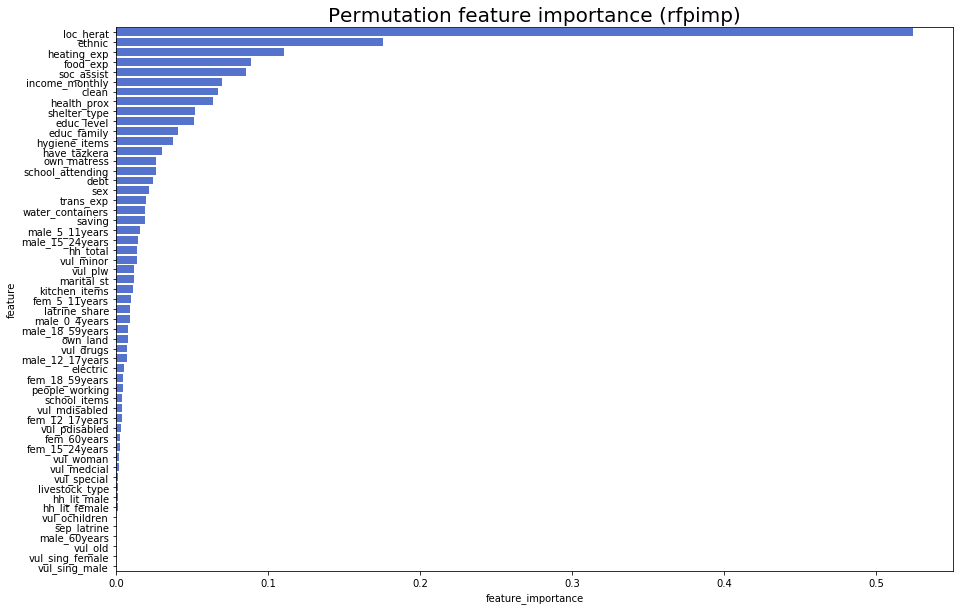

In [0]:
var_imp_plot(perm_imp_rfpimp, 'Permutation feature importance (rfpimp)')



From this approach, we could see that the plot confirms what we have seen above, that the first 3 variables are the most important. The most interesting aspect is being unaccompanied minor(_vul_minor_) and ethnicity(_ethnic_) which are added into the most 10 important variables. One more nice feature about rfpimp is that it contains functionalities for dealing with the issue of collinear features.

### Drop Column feature importance

This approach requires to drop one feature from the training data and compare this model’s feature importance with all features model. This process will be performed for all features. This technique is assumed to be more accurate feature importance than permutation and default future importance.

In [0]:
from sklearn.base import clone 
def dropcol_importances(rf, X_train, y_train):
    rf_ = clone(rf)
    rf_.random_state = 999
    rf_.fit(X_train, y_train)
    baseline = rf_.oob_score_
    imp = []
    for col in X_train.columns:
        X = X_train.drop(col, axis=1)
        rf_ = clone(rf)
        rf_.random_state = 999
        rf_.fit(X, y_train)
        o = rf_.oob_score_
        imp.append(baseline - o)
    imp = np.array(imp)
    I = pd.DataFrame(
            data={'Feature':X_train.columns,
                  'Importance':imp}).sort_values('Importance', ascending = False).reset_index(drop = True)
    return I

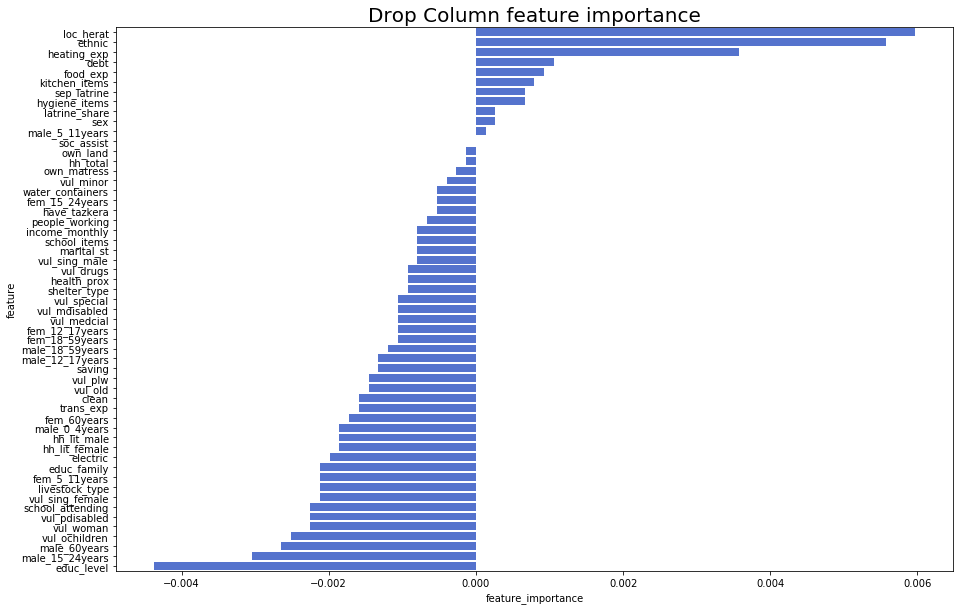

In [0]:
drop_imp = dropcol_importances(clf, X_train, y_train)
var_imp_plot(drop_imp, 'Drop Column feature importance')

Firstly, negative importance, in this case, infers that eliminating given features from the model improves the performance.  The top 10 features stay the same. While it is surprising that by removing expenditure for transport (_trans_exp_), the performance boost can be observed, though it was among the most important variable in previous approaches. By observing other least important features, it can be extrapolated that it matches quite well with the least important variables from previous approaches.

## Shapley Additive explanations (SHAP)

The goal of SHAP is to explain the prediction of an instance x by computing the contribution of each feature to the prediction. The SHAP explanation method computes Shapley values from coalitional game theory. The feature values of a data instance act as players in a coalition. Shapley values tell us how to fairly distribute the “payout” (= the prediction) among the features. A player can be an individual feature value, e.g. for tabular data. A player can also be a group of feature values. For example, to explain an image, pixels can be grouped to super pixels and the prediction distributed among them. One innovation that SHAP brings to the table is that the Shapley value explanation is represented as an additive feature attribution method, a linear model.

In [12]:
!pip install shap
import shap
explainer = shap.TreeExplainer(clf)
rf_shap_values=explainer.shap_values(X_train)

     |████████████████████████████████| 266kB 3.4MB/s 
  Created wheel for shap: filename=shap-0.34.0-cp36-cp36m-linux_x86_64.whl size=383196 sha256=3267c51ea0bb142d7d2572849bdb007f992e03444f89f7b95aeb39d4da3fde18
  Stored in directory: /root/.cache/pip/wheels/28/7e/28/57bc9fcb77579b0df6561298648249370648c0b91dfe42c8ec
Successfully built shap


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


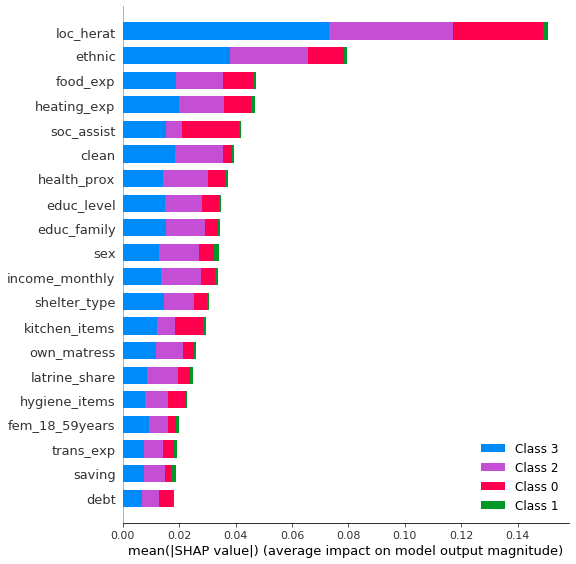

In [13]:
shap.summary_plot(rf_shap_values, X_train, plot_type="bar")

The figure above illustrates the SHAP values of a model's output to explain how features impact the output of the model. For _fam_origin_, mean(|SHAP|) is about 0.08 on Class 3(Host), and (0.15-0.08)=0.07 on Class 0 (__Conflict IDPs__), it means _fam_origin_ influence predicting Class 3 and Class 0  quite the same. _Fam_origin_ is also the most influential feature globally. As can be seen from the graph due to the imbalanced structure of the data, Class 1 and Class 2 covers a tiny fraction in the bar charts. Class 1 and Class 2 covers less than 0.5% of the whole dataset.

# CatBoost

CatBoost is based on gradient boosting. It is a machine learning algorithm that allows users to quickly handle categorical features for a large data set and this differentiates it from XGBoost & LightGBM. CatBoost has also a unique advancement in the implementation of ordered boosting. Both techniques help to fight a prediction shift caused by a special kind of target leakage present in all existing implementations of gradient boosting algorithms. CatBoost provides the functionality to calculate the effect of instances from the training dataset on the optimized metric values. In the feature importance function, you can get the SHAP values, just by mentioning type=’ShapValues’

In [14]:
!pip install catboost
!pip install shap
from catboost import CatBoostClassifier
from catboost import cv

     |████████████████████████████████| 64.0MB 45kB/s 


# Machine Learning Model: CatBoost

CatBoost is based on gradient boosting. It is a machine learning algorithm that allows users to quickly handle categorical features for a large data set and this differentiates it from XGBoost & LightGBM. CatBoost has also a unique advancement in the implementation of ordered boosting. Both techniques help to fight a prediction shift caused by a special kind of target leakage present in all existing implementations of gradient boosting algorithms. CatBoost provides the functionality to calculate the effect of instances from the training dataset on the optimized metric values. In the feature importance function, you can get the SHAP values, just by mentioning type=’ShapValues’

In [0]:
cat_features = list([i for i in range(len(X.columns)) if i not in range(4,20)])

In [0]:
columns = [i for i in X.columns]
cat_columns = [columns[i] for i in cat_features]

In [0]:
from catboost import Pool
pool = Pool(data=X, label=Y, cat_features=cat_columns) 

In [0]:
train_pool = Pool(
    data=X_train,
    label = y_train,
    cat_features=cat_features
)

test_pool = Pool(
    data=X_test,
    label = y_test,
    cat_features=cat_features
)

In [19]:
ctb= CatBoostClassifier(learning_rate=0.05, early_stopping_rounds=20)
ctb.fit(train_pool, eval_set = test_pool, verbose=False)

In [20]:
y_pred=ctb.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8210441334768568


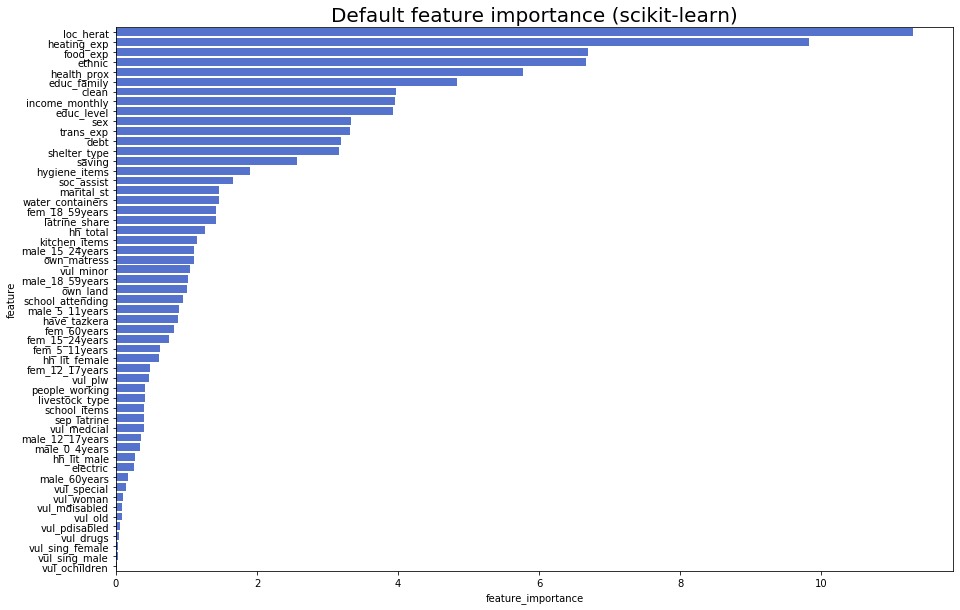

In [21]:
base_imp = imp_df(X_train.columns, ctb.feature_importances_)
var_imp_plot(base_imp, 'Default feature importance (scikit-learn)')

In [22]:
shap_values = ctb.get_feature_importance(
    test_pool,
    'ShapValues'
)
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]
print(shap_values.shape)

(3716, 3, 56)


In [23]:
try:
    # TypeError: object of type 'NoneType' has no len()
    explainer = shap.TreeExplainer(ctb)
    print(explainer.expected_value.round(4))
except:
    print('Exception!')
    shap_values = ctb.get_feature_importance(train_pool, type="ShapValues")
    expected_value = shap_values[:,-1][0]
    print(expected_value.round(4))

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Exception!
[-1.5900e-01 -6.9400e-02 -1.7100e-02 -5.2400e-02 -4.0000e-02 -3.1000e-03
  4.2000e-03  1.3000e-02  2.1200e-02  9.7000e-03  3.6400e-02  3.1500e-02
  1.3270e-01  2.6900e-02  1.6200e-02  6.8000e-03  1.9000e-03  3.0000e-04
 -5.0000e-04  6.3200e-02  2.1900e-02 -1.7620e-01  6.6600e-02  5.1100e-02
 -2.6800e-02 -3.0000e-02  9.0000e-03  5.0000e-04 -9.0000e-04 -6.0000e-04
 -9.0000e-04  2.0000e-04 -2.0000e-04  1.3000e-03  2.0000e-03  3.4000e-03
  3.0000e-04 -6.0000e-04 -5.2900e-02  4.0000e-02  4.8000e-03 -1.1020e-01
 -9.0000e-03 -1.0900e-02  2.1300e-02 -1.3330e-01  2.5300e-02 -4.1500e-02
 -1.4400e-02 -5.5200e-02  2.5100e-02 -3.9700e-02 -5.7000e-03  3.3300e-02
  1.1100e-02  2.4573e+00]


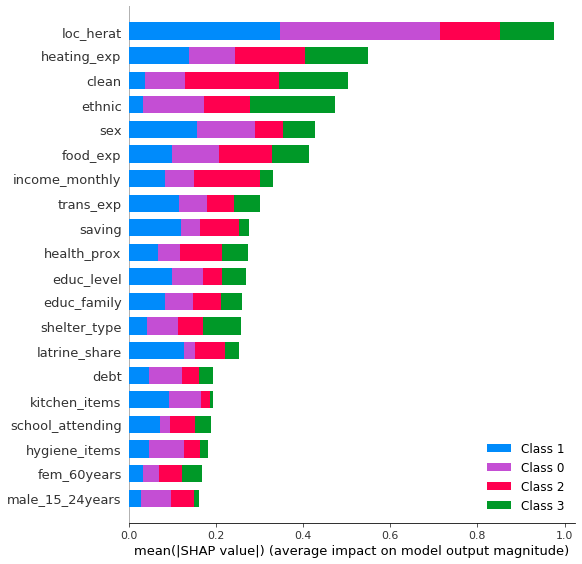

(4, 7544, 56)


In [24]:
import shap
shap_values_transposed = shap_values.transpose(1, 0, 2)

shap.summary_plot(list(shap_values_transposed[:,:,:-1]), X_train)
assert shap_values[0, 1, 2] == shap_values_transposed[1, 0, 2]  # just check we've done it right
print(shap_values_transposed.shape)

The CatBoost SHAP added new variables to the feature importance. Each class is homogeneously distributed within the features, which means that contribution is normalized based on the total datasets. It can be observed top 10 the most important features are quite similar to Random Forest SHAP, while some orders could be different

# Conclusion
By comparing all the techniques of identifying feature importance, it can be concluded that SHAP provides more robust performance compared with other techniques.  SHAP also has a solid theoretical foundation in game theory. The difference of CatBoost from Random Forest SHAP Value, CatBoost uses Stratified cross-validation. It increases the weight of underrepresented classes, to avoid false-positive predictions. However, the given data set is not structured as a typical imbalanced dataset, since there is no high risk of predicting wrong Class 1 and Class 2. Predicting right Class 3 and Class 0 is sufficient. Thus, I assume Random forest SHAP outperforms CatBoost SHAP.

## Source:
1.	https://christophm.github.io/interpretable-ml-book/shap.html
2.	Lundberg, Scott M., and Su-In Lee. “A unified approach to interpreting model predictions.” Advances in Neural Information Processing Systems. 2017
3.	https://shap.readthedocs.io/en/latest/
4.	https://catboost.ai/docs/concepts/tutorials.html
nce there is no high risk of predicting wrong Class 1 and Class 2. Predicting right Class 3 and Class 0 is sufficient. Thus, I assume Random forest SHAP outperforms CatBoost SHAP.
